In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
heart_data=pd.read_csv("SAheart.csv")
heart_data.head(10)

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,Si
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,Si
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,No
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,Si
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,Si
5,132,6.20,6.47,36.21,Present,62,30.77,14.14,45,No
6,142,4.05,3.38,16.20,Absent,59,20.81,2.62,38,No
7,114,4.08,4.59,14.60,Present,62,23.11,6.72,58,Si
8,114,0.00,3.83,19.40,Present,49,24.86,2.49,29,No
9,132,0.00,5.80,30.96,Present,69,30.11,0.00,53,Si


In [3]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sbp        462 non-null    int64  
 1   tobacco    462 non-null    float64
 2   ldl        462 non-null    float64
 3   adiposity  462 non-null    float64
 4   famhist    462 non-null    object 
 5   typea      462 non-null    int64  
 6   obesity    462 non-null    float64
 7   alcohol    462 non-null    float64
 8   age        462 non-null    int64  
 9   chd        462 non-null    object 
dtypes: float64(5), int64(3), object(2)
memory usage: 36.2+ KB


In [4]:
people_with_chd=heart_data[heart_data["chd"]=="Si"]
people_with_chd

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,Si
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,Si
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,Si
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,Si
7,114,4.08,4.59,14.60,Present,62,23.11,6.72,58,Si
...,...,...,...,...,...,...,...,...,...,...
453,124,1.60,7.22,39.68,Present,36,31.50,0.00,51,Si
454,146,0.64,4.82,28.02,Absent,60,28.11,8.23,39,Si
455,128,2.24,2.83,26.48,Absent,48,23.96,47.42,27,Si
458,182,4.20,4.41,32.10,Absent,52,28.61,18.72,52,Si


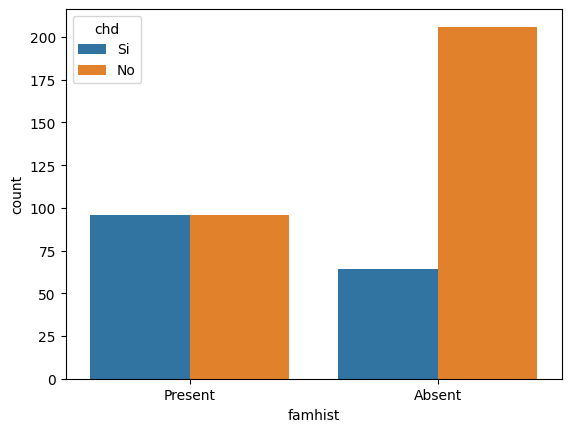

In [10]:
sns.countplot(data=heart_data,x="famhist",hue="chd")
plt.show()

In [11]:
factors=["sbp","age"]
corr_sbp_age=heart_data[factors].corr()
corr_sbp_age

,sbp,age
sbp,1.000000,0.388771
age,0.388771,1.000000


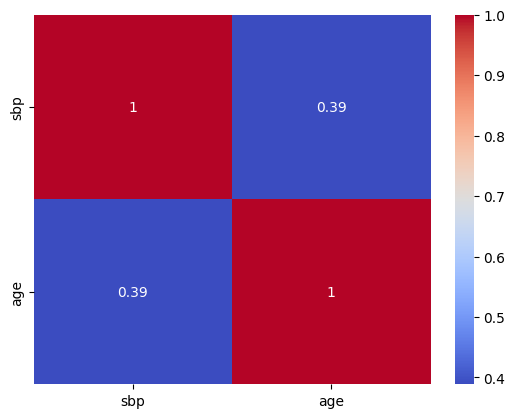

In [13]:
sns.heatmap(corr_sbp_age,annot=True,cmap="coolwarm")
plt.show()

In [14]:
heart_data

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,Si
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,Si
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,No
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,Si
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,Si
...,...,...,...,...,...,...,...,...,...,...
457,214,0.40,5.98,31.72,Absent,64,28.45,0.00,58,No
458,182,4.20,4.41,32.10,Absent,52,28.61,18.72,52,Si
459,108,3.00,1.59,15.23,Absent,40,20.09,26.64,55,No
460,118,5.40,11.61,30.79,Absent,64,27.35,23.97,40,No


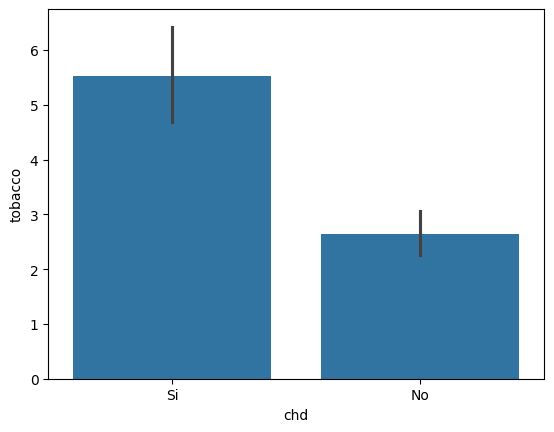

In [24]:
sns.barplot(data=heart_data,x="chd",y="tobacco")
plt.show()

In [26]:
factors=["sbp","obesity","age","ldl"]
correlation=heart_data[factors].corr()
correlation

,sbp,obesity,age,ldl
sbp,1.000000,0.238067,0.388771,0.158296
obesity,0.238067,1.000000,0.291777,0.330506
age,0.388771,0.291777,1.000000,0.311799
ldl,0.158296,0.330506,0.311799,1.000000


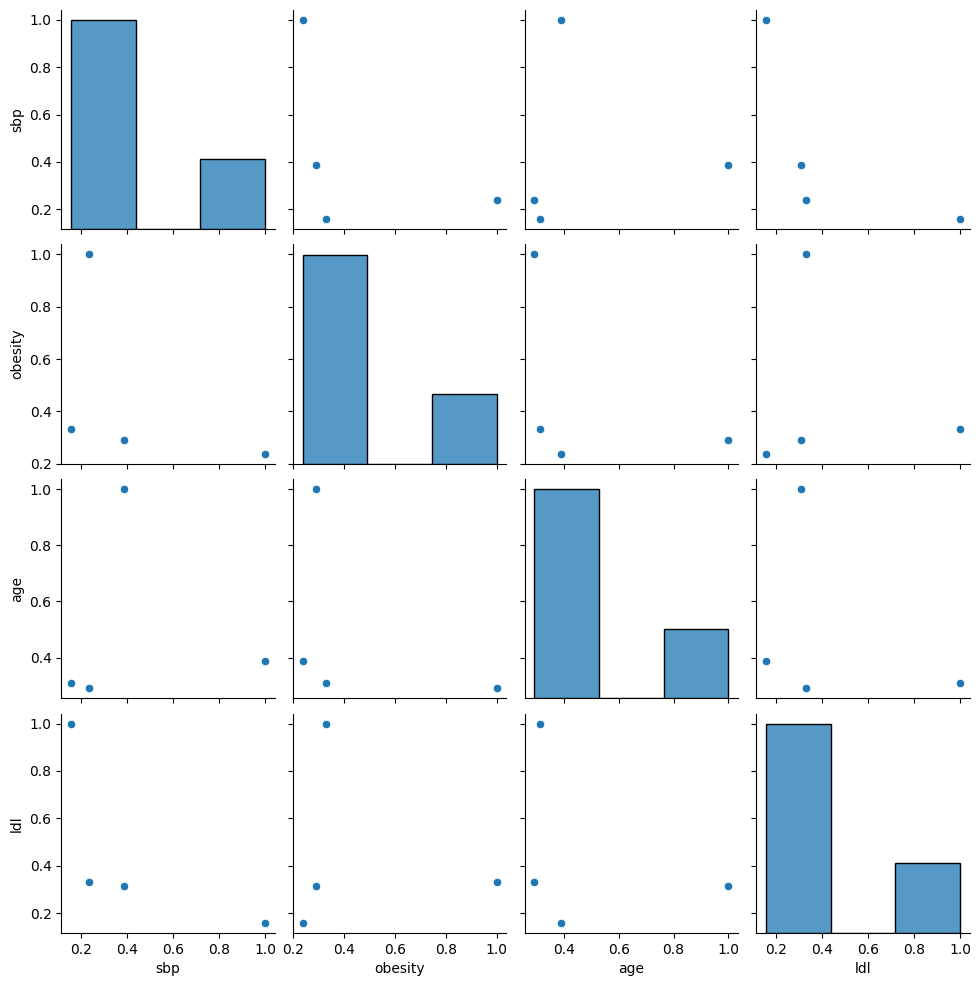

In [27]:
sns.pairplot(correlation)
plt.show()

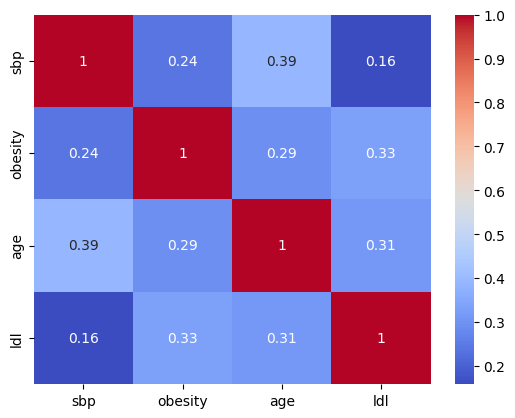

In [28]:
sns.heatmap(correlation,annot=True,cmap="coolwarm")
plt.show()

In [30]:
def categorize_age(age):
    if(age>0 and age<=15):
        return "young"
    elif(age>15 and age<=35):
        return "adults"
    elif(age>35 and age<=55):
        return "mid"
    else:
        return "old"
    
heart_data["agegroup"]=heart_data["age"].apply(categorize_age)

In [31]:
heart_data

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd,agegroup
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,Si,mid
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,Si,old
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,No,mid
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,Si,old
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,Si,mid
...,...,...,...,...,...,...,...,...,...,...,...
457,214,0.40,5.98,31.72,Absent,64,28.45,0.00,58,No,old
458,182,4.20,4.41,32.10,Absent,52,28.61,18.72,52,Si,mid
459,108,3.00,1.59,15.23,Absent,40,20.09,26.64,55,No,mid
460,118,5.40,11.61,30.79,Absent,64,27.35,23.97,40,No,mid


In [34]:
people_with_chd=heart_data[heart_data["chd"]=="Si"]
people_with_chd

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd,agegroup
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,Si,mid
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,Si,old
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,Si,old
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,Si,mid
7,114,4.08,4.59,14.60,Present,62,23.11,6.72,58,Si,old
...,...,...,...,...,...,...,...,...,...,...,...
453,124,1.60,7.22,39.68,Present,36,31.50,0.00,51,Si,mid
454,146,0.64,4.82,28.02,Absent,60,28.11,8.23,39,Si,mid
455,128,2.24,2.83,26.48,Absent,48,23.96,47.42,27,Si,adults
458,182,4.20,4.41,32.10,Absent,52,28.61,18.72,52,Si,mid


In [38]:
chd_acc_agegroup=people_with_chd.value_counts("agegroup").reset_index()
chd_acc_agegroup

,agegroup,count
0,mid,81
1,old,61
2,adults,18


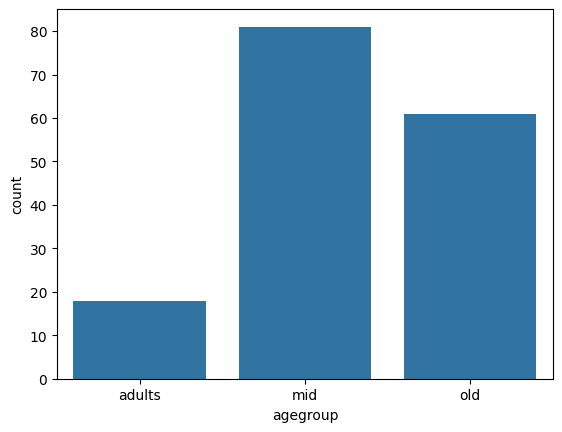

In [40]:
sns.barplot(data=chd_acc_agegroup,x="agegroup",y="count",order=["adults","mid","old"])
plt.show()

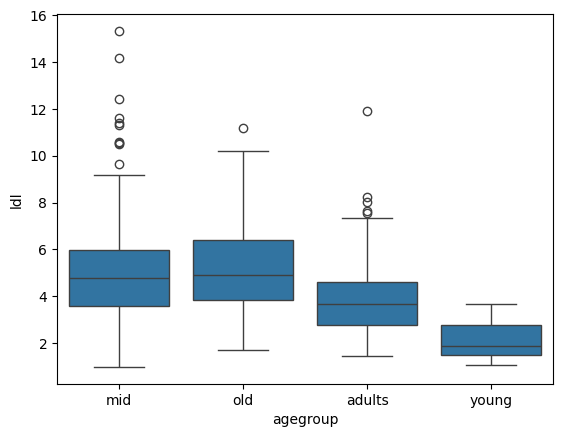

In [41]:
sns.boxplot(data=heart_data,x="agegroup",y="ldl")
plt.show()